In [1]:
ls ./data/gaia_rvs_dataframes/

cks_flux.csv                            raghavan_singles_flux.csv
cks_sigma.csv                           raghavan_singles_sigma.csv
elbadry_singles_flux.csv                raghavan_unresolved_binaries_flux.csv
elbadry_singles_sigma.csv               raghavan_unresolved_binaries_sigma.csv
elbadry_tableE3_binaries_flux.csv       spocs_flux.csv
elbadry_tableE3_binaries_sigma.csv      spocs_sigma.csv
galah_binaries_flux.csv                 test_flux_OLD.csv
galah_binaries_sigma.csv                test_sigma_OLD.csv
galah_control_flux.csv                  training_flux.csv
galah_control_sigma.csv                 training_flux_cleaned.csv
raghavan_resolved_binaries_flux.csv     training_sigma.csv
raghavan_resolved_binaries_sigma.csv    training_sigma_cleaned.csv


In [10]:
import pandas as pd
import gaia_spectrum as gs

single_flux = pd.read_csv('./data/gaia_rvs_dataframes/raghavan_singles_flux.csv')
single_sigma = pd.read_csv('./data/gaia_rvs_dataframes/raghavan_singles_sigma.csv')

binary_flux = pd.read_csv('./data/gaia_rvs_dataframes/raghavan_unresolved_binaries_flux.csv')
binary_sigma = pd.read_csv('./data/gaia_rvs_dataframes/raghavan_unresolved_binaries_sigma.csv')

In [17]:
singles_chisq = []
singles_delta_chisq = []
for source_id in single_flux.columns[1:]:
    flux, sigma = single_flux[source_id], single_sigma[source_id]
    spec = gs.GaiaSpectrum(source_id, flux, sigma)
    singles_chisq.append(spec.single_fit_chisq)
    singles_delta_chisq.append(spec.single_fit_chisq - spec.binary_fit_chisq)

19316224572460416


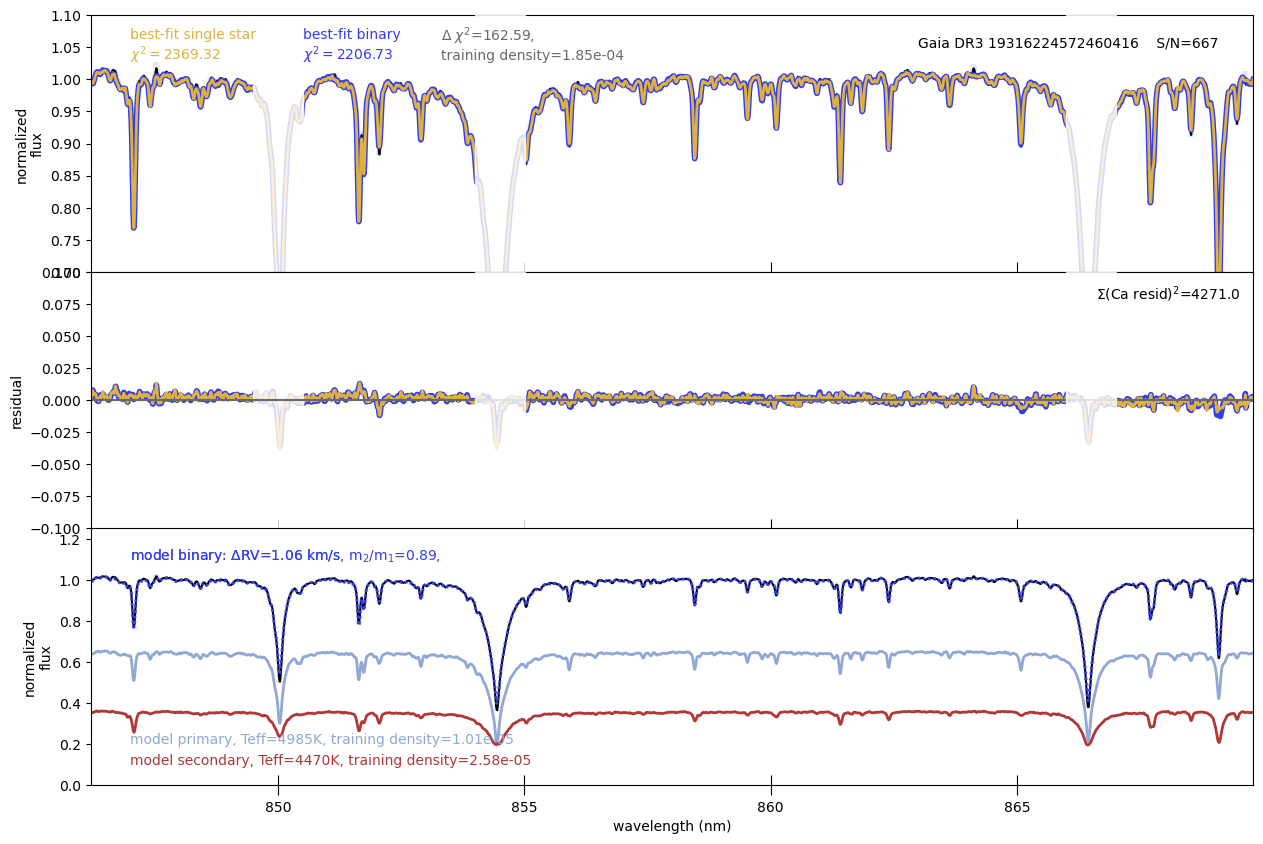

5173902189571919872


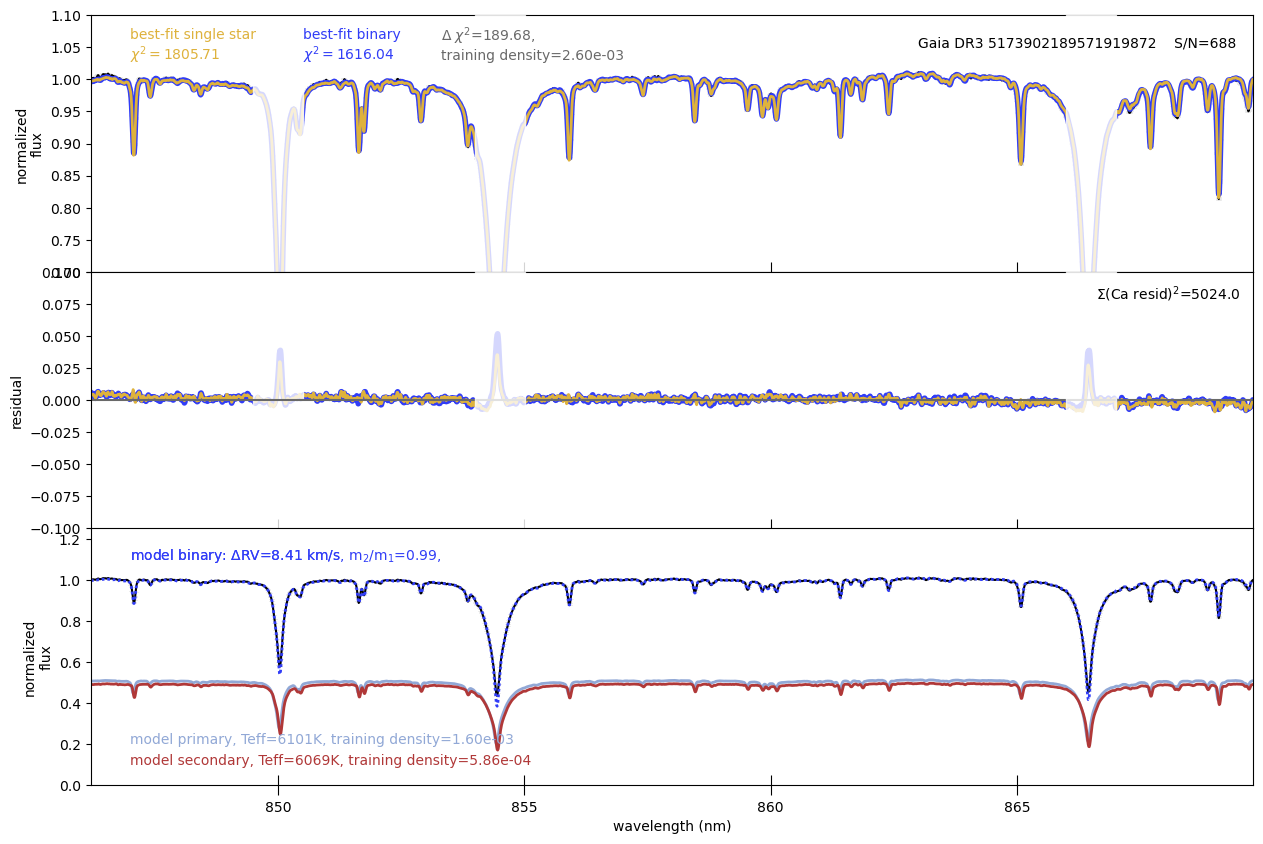

746545172372256384


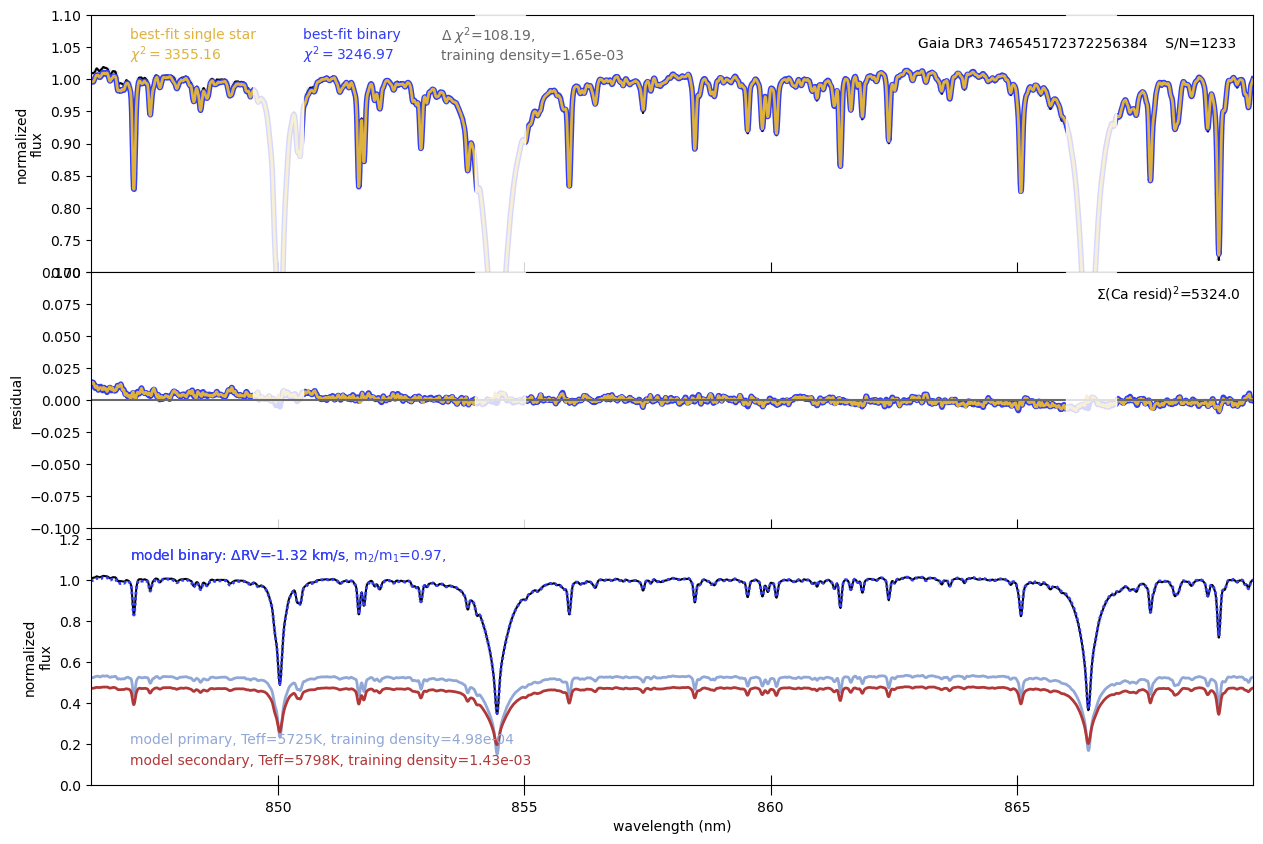

3626268998574790656


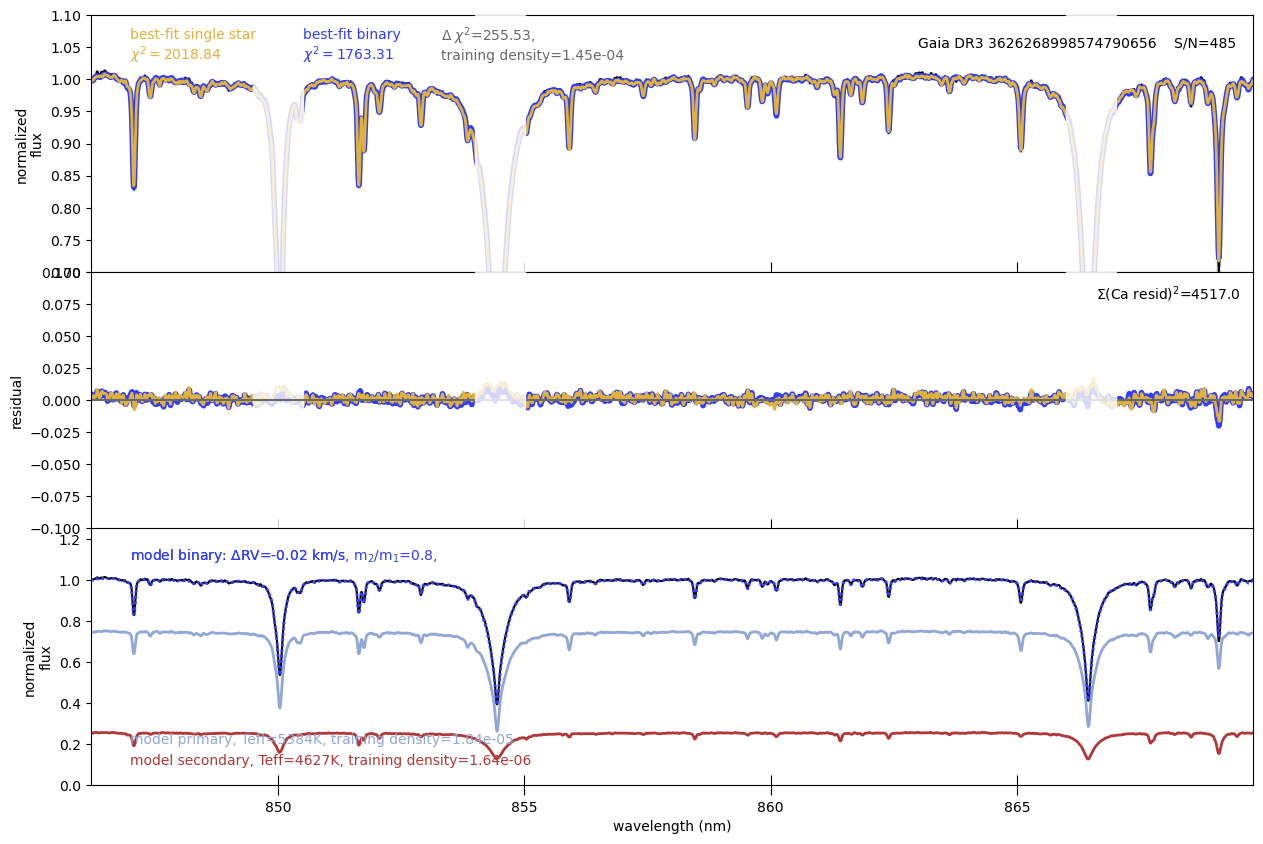

6317854874752594048


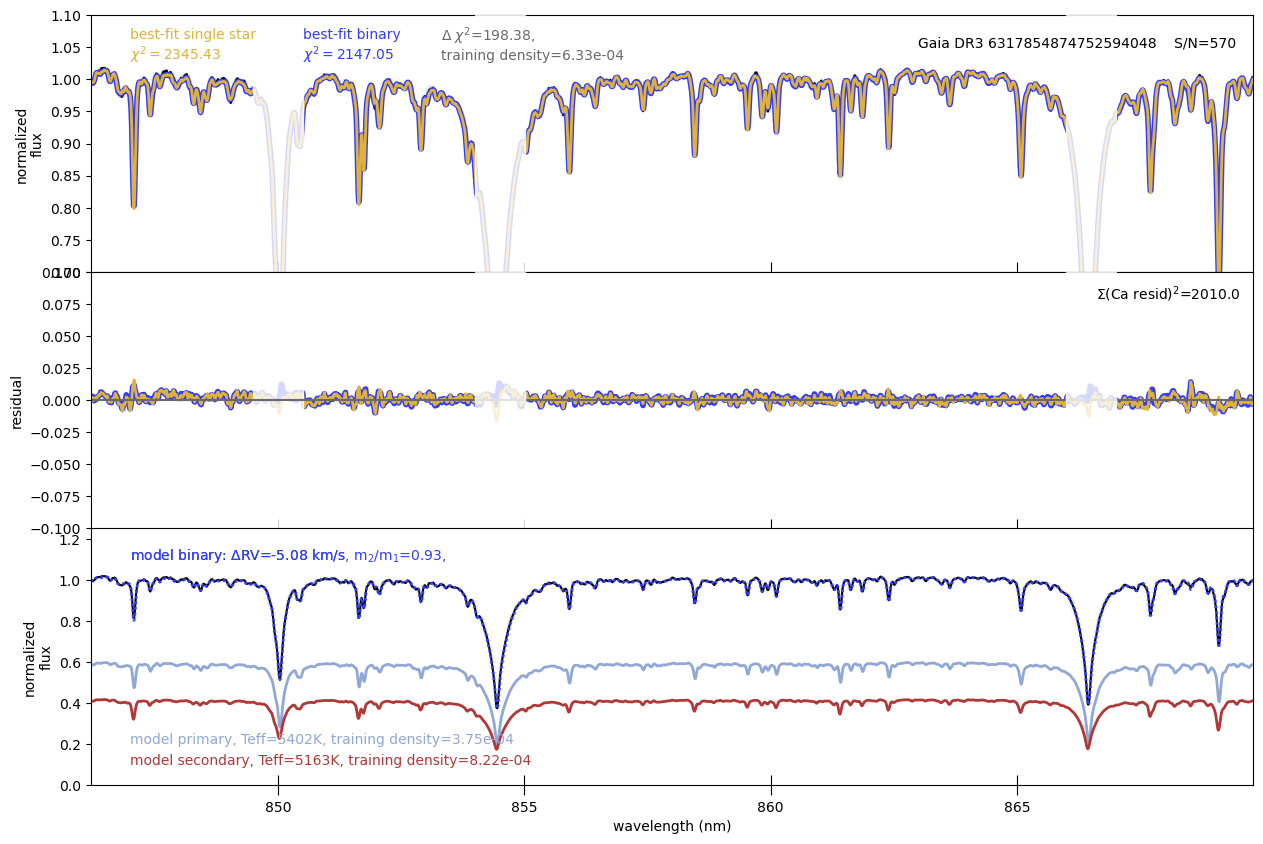

4377160604838377600


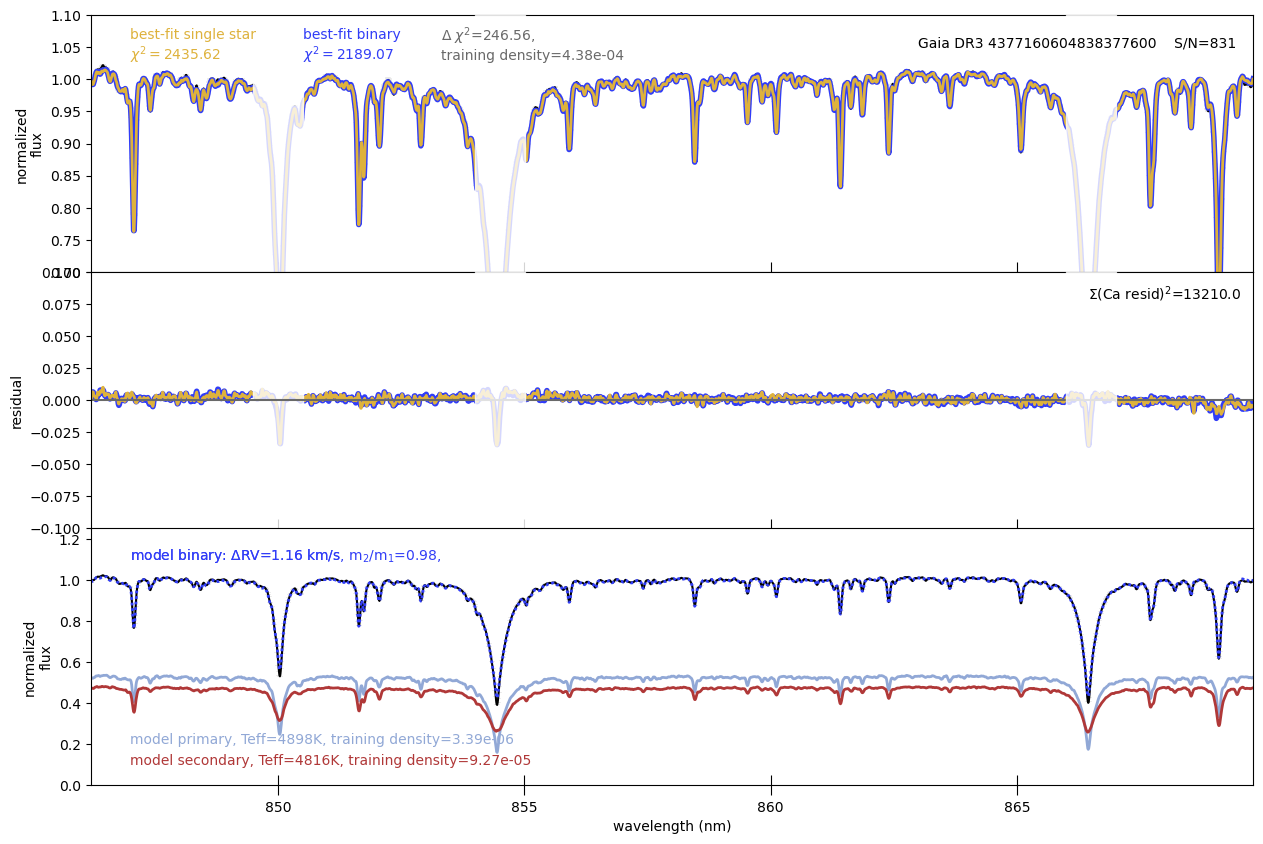

In [25]:
# let me plot all the single stars...
binary_chisq = []
binary_delta_chisq = []
for source_id in binaries_flux.columns[1:]:
    print(source_id)
    flux, sigma = binary_flux[source_id], binary_sigma[source_id]
    spec = gs.GaiaSpectrum(source_id, flux, sigma)
    spec.plot()
    binary_chisq.append(spec.single_fit_chisq)
    binary_delta_chisq.append(spec.single_fit_chisq - spec.binary_fit_chisq)

In [18]:
# okay, what's happening with these binaries?
# single fit chisq : >2700 is odd
# first one: recovered with delta chisq, mass ratio is maybe high?
# second one: recovered with delta chisq, mass ratio is still high byt dRV isn't
# third one: recovered with delta chisq, mass ratio is still high
# fourth one: well-recovered with delta chisq, mass ratio is reasonable!
# fifth one: recovered with delta chisq, mass ratio is a little high...
# sixth one: well-recovered wtih delta chisq, mass rati ois high though...

# okay I need to check what the mass ratios are of these binaries.
# can I?

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, '$\\Delta\\chi^2$')

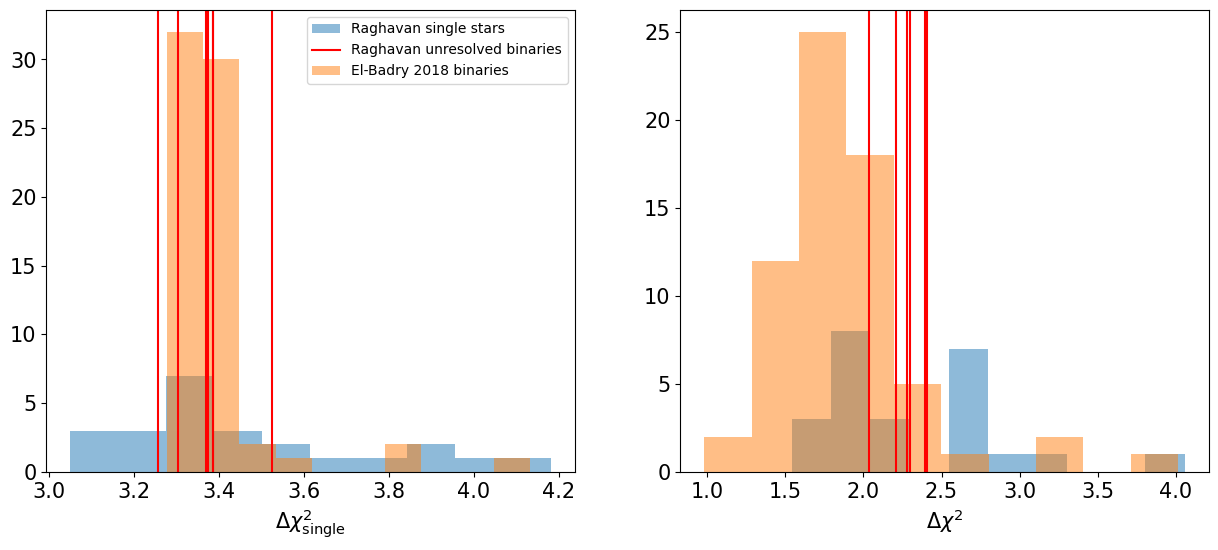

In [56]:
# let me over-plot this.
# then I need to look up the binary objects' source ids somehow
eb = pd.read_csv('./data/binary_metric_dataframes/s2_emp/binary_metrics.csv')

%pylab inline
figure(figsize=(15,6))
rcParams['font.size']=15
subplot(121)
hist(np.log10(singles_chisq), alpha=0.5, label='Raghavan single stars')
for i in np.log10(binary_chisq):
    axvline(i, color='r')
axvline(i, color='r', label='Raghavan unresolved binaries')
hist(np.log10(eb.single_fit_chisq), alpha=0.5, label='El-Badry 2018 binaries')
legend(fontsize=10)
xlabel(r'$\Delta\chi^2_{\rm single}$')
    
subplot(122)
hist(np.log10(singles_delta_chisq), alpha=0.5)
for i in np.log10(binary_delta_chisq):
    axvline(i, color='r')
hist(np.log10(eb.delta_chisq), alpha=0.5)
xlabel(r'$\Delta\chi^2$')